<h1>Correlation Analysis of Auto Sales Data</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = "{:,.1f}".format
plt.style.use('seaborn-v0_8-ticks')

<h3>Loading Dataset</h3>

In [77]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Full-Stack Projects\Automotive Sales Data Analysis\Dataset\Auto Sales data.csv")
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,"2,871.0",24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.3,5,"2,765.9",7/5/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.7,2,"3,884.3",1/7/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.3,6,"3,746.7",25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.7,1,"3,479.8",28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.1,9,"2,497.8",11/11/2018,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.8,1,"5,512.3",18/11/2018,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.8,14,"4,708.4",15/01/2019,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.2,1,"3,965.7",20/02/2019,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.4,7,"2,333.1",5/4/2019,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


<h3>Checking Data and Getting Overview</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [4]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 2747
Columns: 20


In [5]:
df.isna().sum().sort_values(ascending=False)

ORDERNUMBER             0
QUANTITYORDERED         0
CONTACTFIRSTNAME        0
CONTACTLASTNAME         0
COUNTRY                 0
POSTALCODE              0
CITY                    0
ADDRESSLINE1            0
PHONE                   0
CUSTOMERNAME            0
PRODUCTCODE             0
MSRP                    0
PRODUCTLINE             0
STATUS                  0
DAYS_SINCE_LASTORDER    0
ORDERDATE               0
SALES                   0
ORDERLINENUMBER         0
PRICEEACH               0
DEALSIZE                0
dtype: int64

<b>Well, there is no null value so we can proceed without much effort</b>

<h3>Correlation analysis using heatmap</h3>

In [39]:
df_numerized = df

In [40]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [41]:
df_numerized

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,"2,871.0",134,828,5,1,95,0,44,48,54,41,0,18,75,36,2
1,10121,34,81.3,5,"2,765.9",223,757,5,1,95,0,63,53,39,55,27,6,27,54,2
2,10134,41,94.7,2,"3,884.3",8,703,5,1,95,0,45,16,21,51,41,6,16,11,1
3,10145,45,83.3,6,"3,746.7",139,649,5,1,95,0,82,75,51,52,49,18,74,31,1
4,10168,36,96.7,1,"3,479.8",161,586,5,1,95,0,76,76,55,12,54,18,29,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.2,15,"2,244.4",92,2924,5,3,54,108,32,13,62,33,14,14,24,13,2
2743,10373,29,137.2,1,"3,978.5",188,2865,5,3,54,108,60,87,84,50,50,5,38,56,1
2744,10386,43,126.0,4,"5,417.6",3,2836,4,3,54,108,32,13,62,33,14,14,24,13,1
2745,10397,34,62.2,1,"2,116.2",155,2810,5,3,54,108,1,68,0,66,16,6,58,5,2


In [38]:
df_corr = df_numerized.corr(method = 'pearson')
df_corr

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,1.0,0.1,-0.0,-0.1,0.0,0.0,-0.3,-0.2,-0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,0.0,-0.0,-0.1,-0.0,-0.0
QUANTITYORDERED,0.1,1.0,0.0,-0.0,0.6,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.1,0.0,-0.0,-0.5
PRICEEACH,-0.0,0.0,1.0,-0.1,0.8,0.0,-0.4,0.0,-0.2,0.8,-0.4,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.7
ORDERLINENUMBER,-0.1,-0.0,-0.1,1.0,-0.1,-0.1,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.1,0.0,-0.0,0.0,0.0,0.1,0.1
SALES,0.0,0.6,0.8,-0.1,1.0,0.0,-0.3,-0.0,-0.2,0.6,-0.3,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.9
ORDERDATE,0.0,0.0,0.0,-0.1,0.0,1.0,-0.0,-0.1,-0.0,0.0,-0.0,0.0,0.1,-0.0,-0.1,-0.1,-0.0,0.0,-0.0,-0.0
DAYS_SINCE_LASTORDER,-0.3,-0.0,-0.4,0.0,-0.3,-0.0,1.0,0.0,0.1,-0.5,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.3
STATUS,-0.2,-0.0,0.0,-0.0,-0.0,-0.1,0.0,1.0,-0.0,0.0,-0.0,-0.1,0.1,-0.1,0.1,-0.0,-0.0,0.0,0.1,0.0
PRODUCTLINE,-0.0,-0.0,-0.2,-0.0,-0.2,-0.0,0.1,-0.0,1.0,-0.3,0.1,-0.1,-0.0,0.0,0.0,0.1,-0.0,0.0,0.0,0.1
MSRP,-0.0,0.0,0.8,-0.0,0.6,0.0,-0.5,0.0,-0.3,1.0,-0.5,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.6


| Correlation Coefficient | Correlation Strength | Correlation Type |
|-------------------------|----------------------|------------------|
|       -0.7 to -1        |      Very Strong     |     Negative     |
|       -0.5 to -.7       |         Strong       |     Negative     |
|       -0.3 to -.5       |        Moderate      |     Negative     |
|        0 to -0.3        |          Weak        |     Negative     |
|            0            |          None        |       Zero       |
|        0 to 0.3         |          Weak        |     Positive     |
|        0.3 to 0.5       |        Moderate      |     Positive     |
|        0.5 to 0.7       |         Strong       |     Positive     |
|        0.7 to 1         |      Very Strong     |     Positive     |


Text(0.5, 1.0, 'Correlation of All Columns')

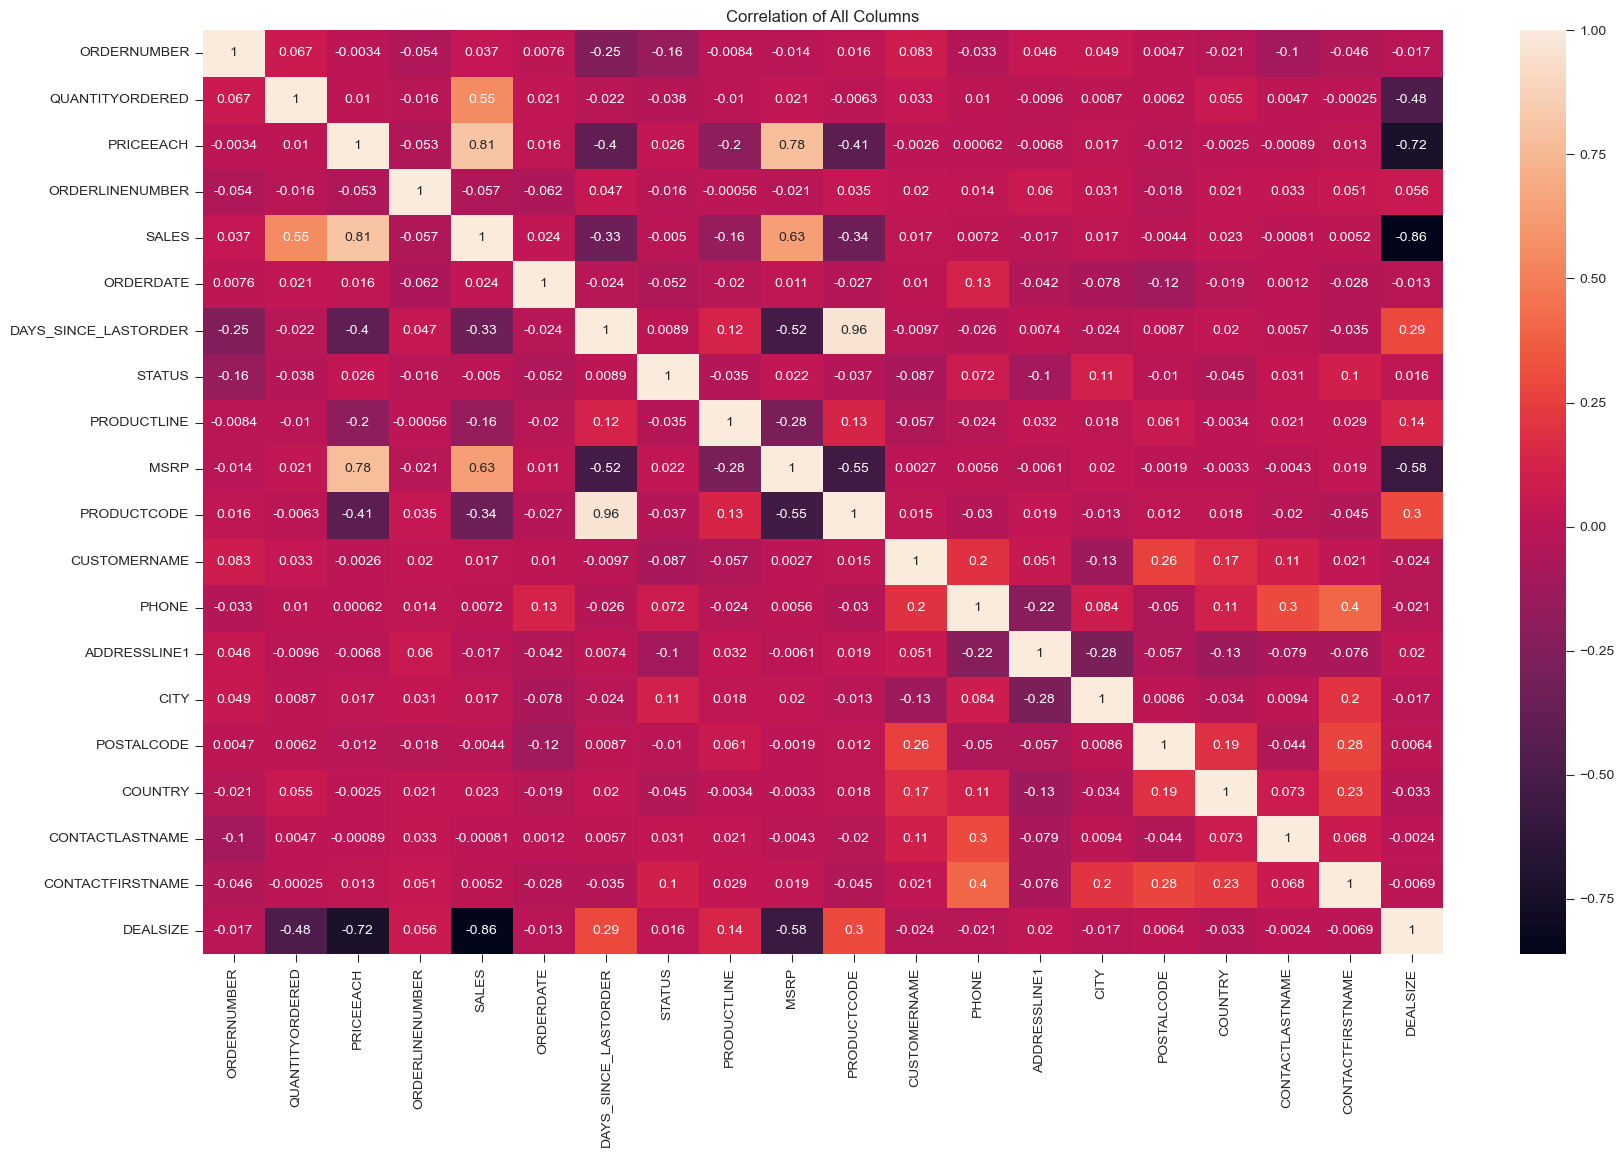

In [30]:
sns.heatmap(df_corr, annot=True)
plt.rcParams['figure.figsize'] = (20, 12)
plt.title('Correlation of All Columns')
#plt.savefig("D:/nevinphilbert/Portfolio/Full-Stack Projects/Automotive Sales Data Analysis/Fig.png")

The columns that has strong positive correlations are:
<ul>
    <li>Product Code and Days Since Last Order, with 0.96 coefficient, Showing very strong positive correlation</li>
    <li>Sales and Price Each, with 0.81 coefficient. Showing very strong positive correlation</li>
    <li>MSRP and Price Each, with 0.78 correlation coefficient. Showing very strong positive correlation type</li>
    <li>MSRP and Sales, with 0.63 coefficient. Showing strong positive correlation type</li>
    <li>Sales and Quantity Ordered, with 0.55 correlation coefficient. Showing strong positive correlation type</li>
</ul>

The columns that has strong negative correlations are:
<ul>
    <li>Dealsize and Sales, with -0.86 coefficient. Showing very strong negative correlation type</li>
    <li>Dealsize and Price Each, with -0.72 coefficient. Showing very strong negative correlation type</li>
    <li>MSRP and Dealsize, with -0.58 coefficient. showing strong negative correlation type</li>
    <li>MSRP and Product Code, with -0.55 coefficient. showing strong negative correlation type</li>
    <li>MSRP and Days Since Last Order, with -0.52 correlation coefficient.  showing strong negative correlation type</li>
    <li>Dealsize and Quantity Ordered, with -0.48 coefficient. showing moderate - strong negative correlation type</li>
</ul>

<h5><b>Visualizing Scatter Plot to describe correlation between variables easier</b></h5>

<h3>Visualizing Correlation</h3>

<h5><b>Positive Correlation</b></h5>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int16  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   int8   
 8   PRODUCTLINE           2747 non-null   int8   
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   int8   
 11  CUSTOMERNAME          2747 non-null   int8   
 12  PHONE                 2747 non-null   int8   
 13  ADDRESSLINE1          2747 non-null   int8   
 14  CITY                  2747 non-null   int8   
 15  POSTALCODE           

<H6><B>Product Code and Days Since Last Order</B></H6>

Text(0.5, 1.0, 'Relationship between Product Code and Days Since Last Order')

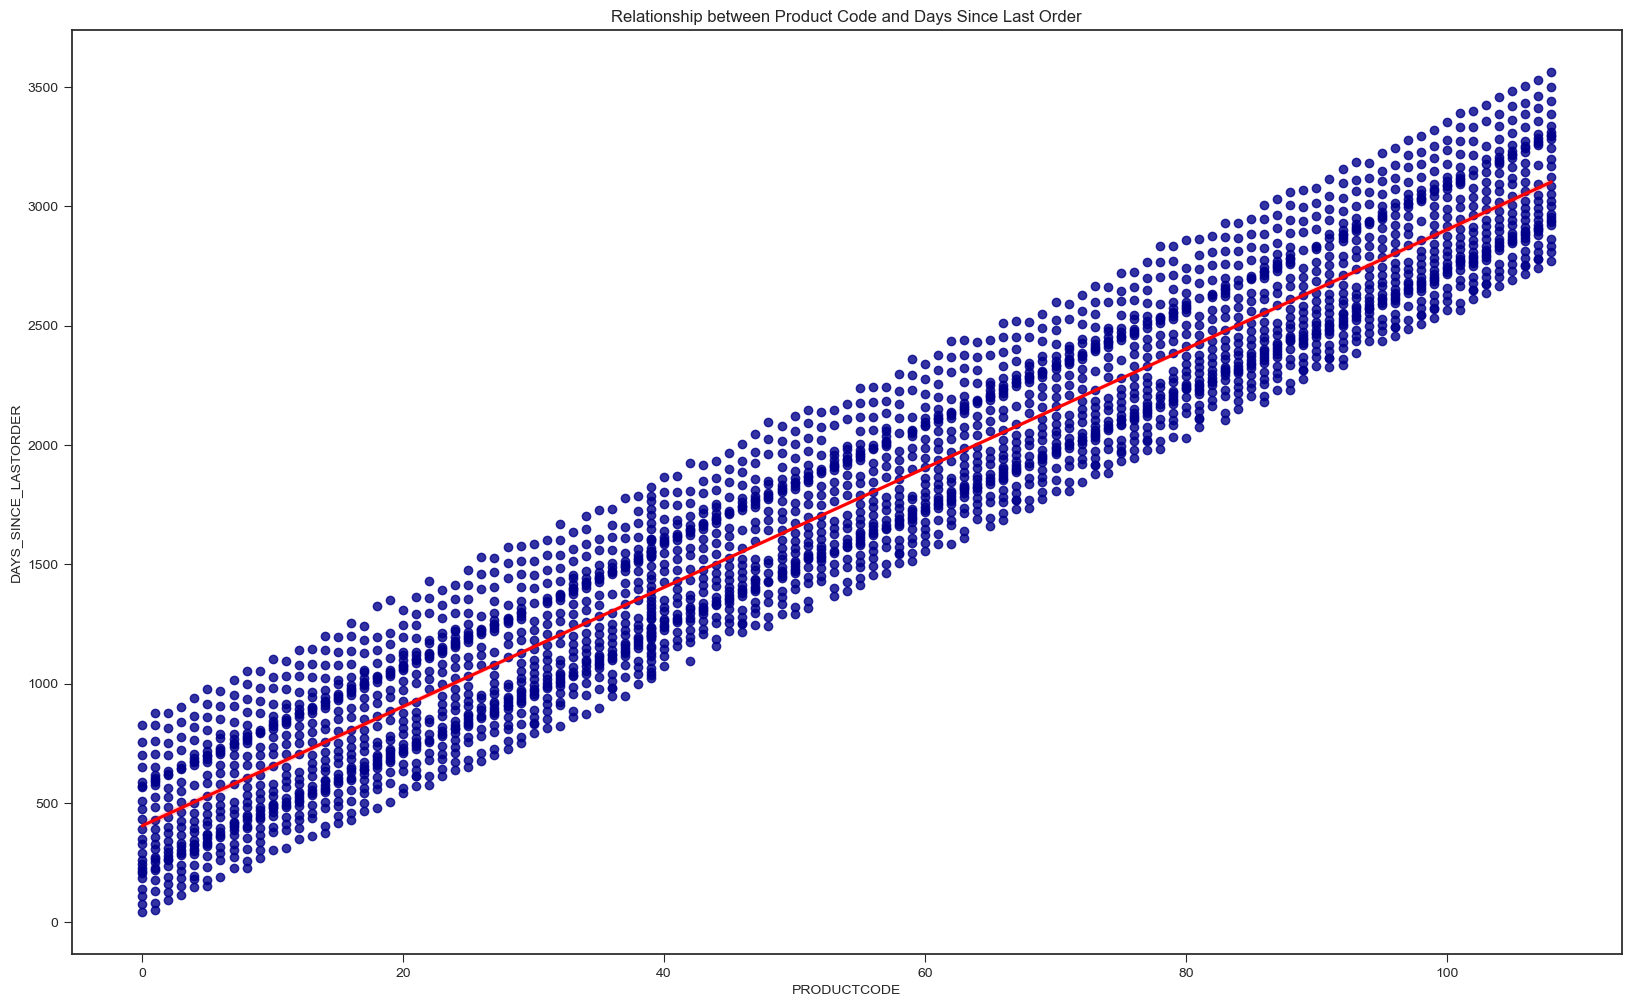

In [58]:
sns.regplot(x='PRODUCTCODE', y='DAYS_SINCE_LASTORDER', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('PRODUCTCODE')
plt.ylabel('DAYS_SINCE_LASTORDER')
plt.title('Relationship between Product Code and Days Since Last Order')

<b>The more popular the Product Code, The more likely it is to be ordered sooner than less popular product</b>

<H6><B>Sales and Price Each</B></H6>

Text(0.5, 1.0, 'Relationship between Sales and Price Each')

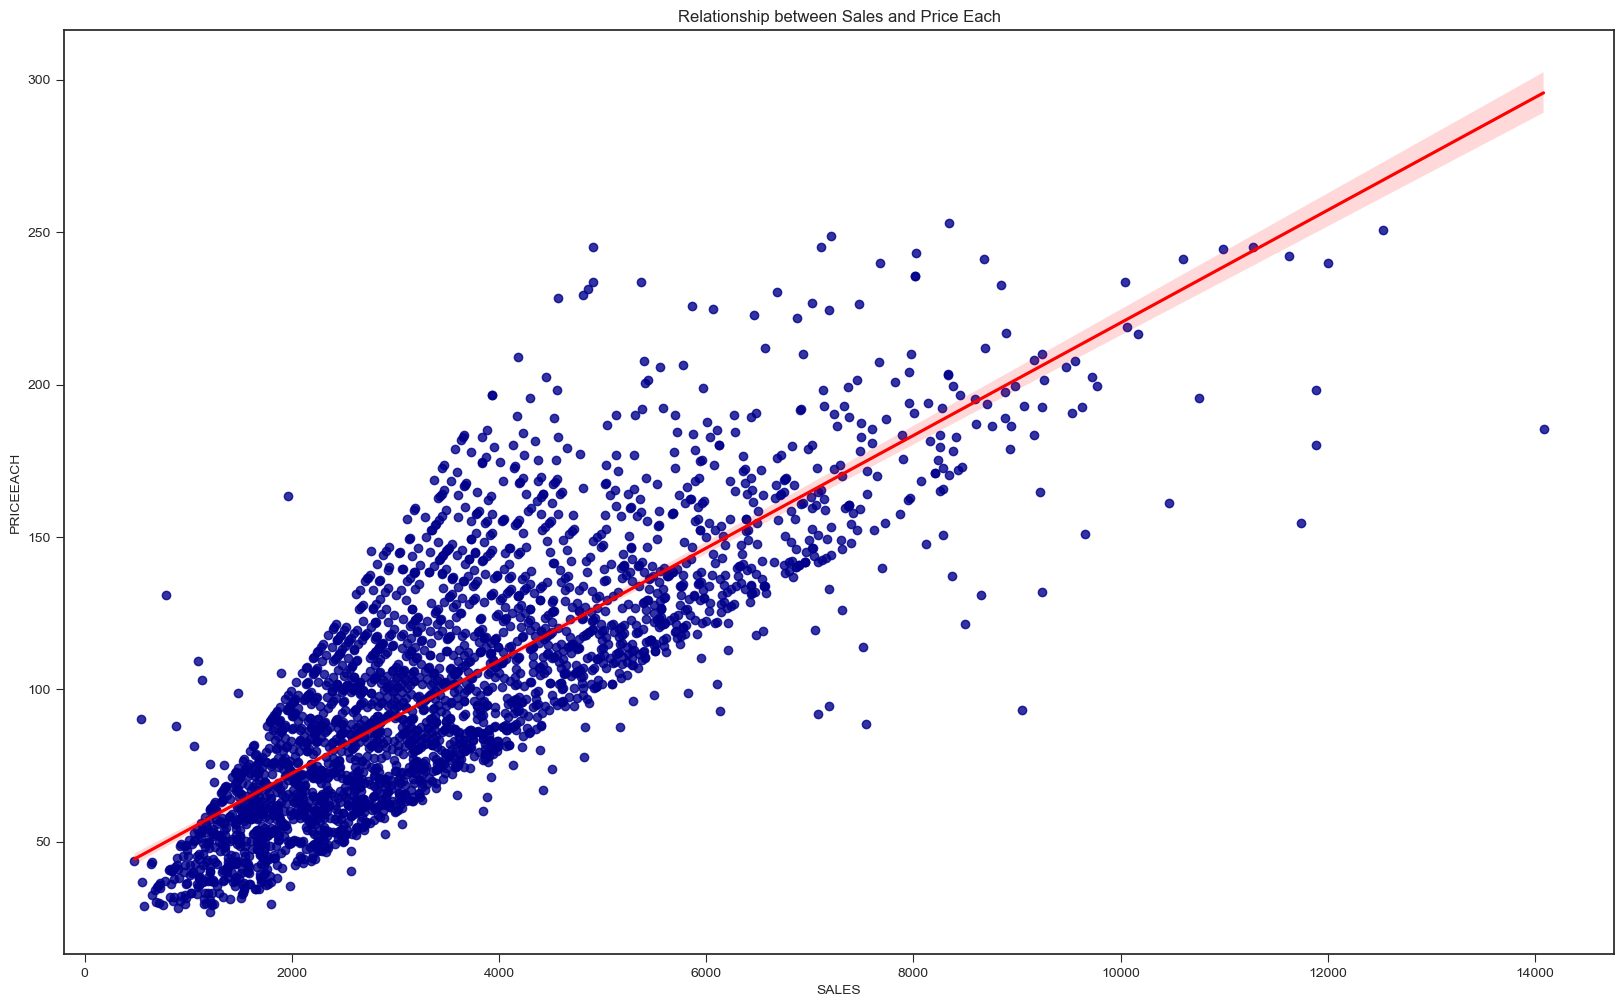

In [57]:
sns.regplot(x='SALES', y='PRICEEACH', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('SALES')
plt.ylabel('PRICEEACH')
plt.title('Relationship between Sales and Price Each')

<b>The higher the sales, the higher the price each and vice versa.</b>

<H6><B>MSRP and Price Each</B></H6>

Text(0.5, 1.0, 'Relationship between MSRP and Price Each')

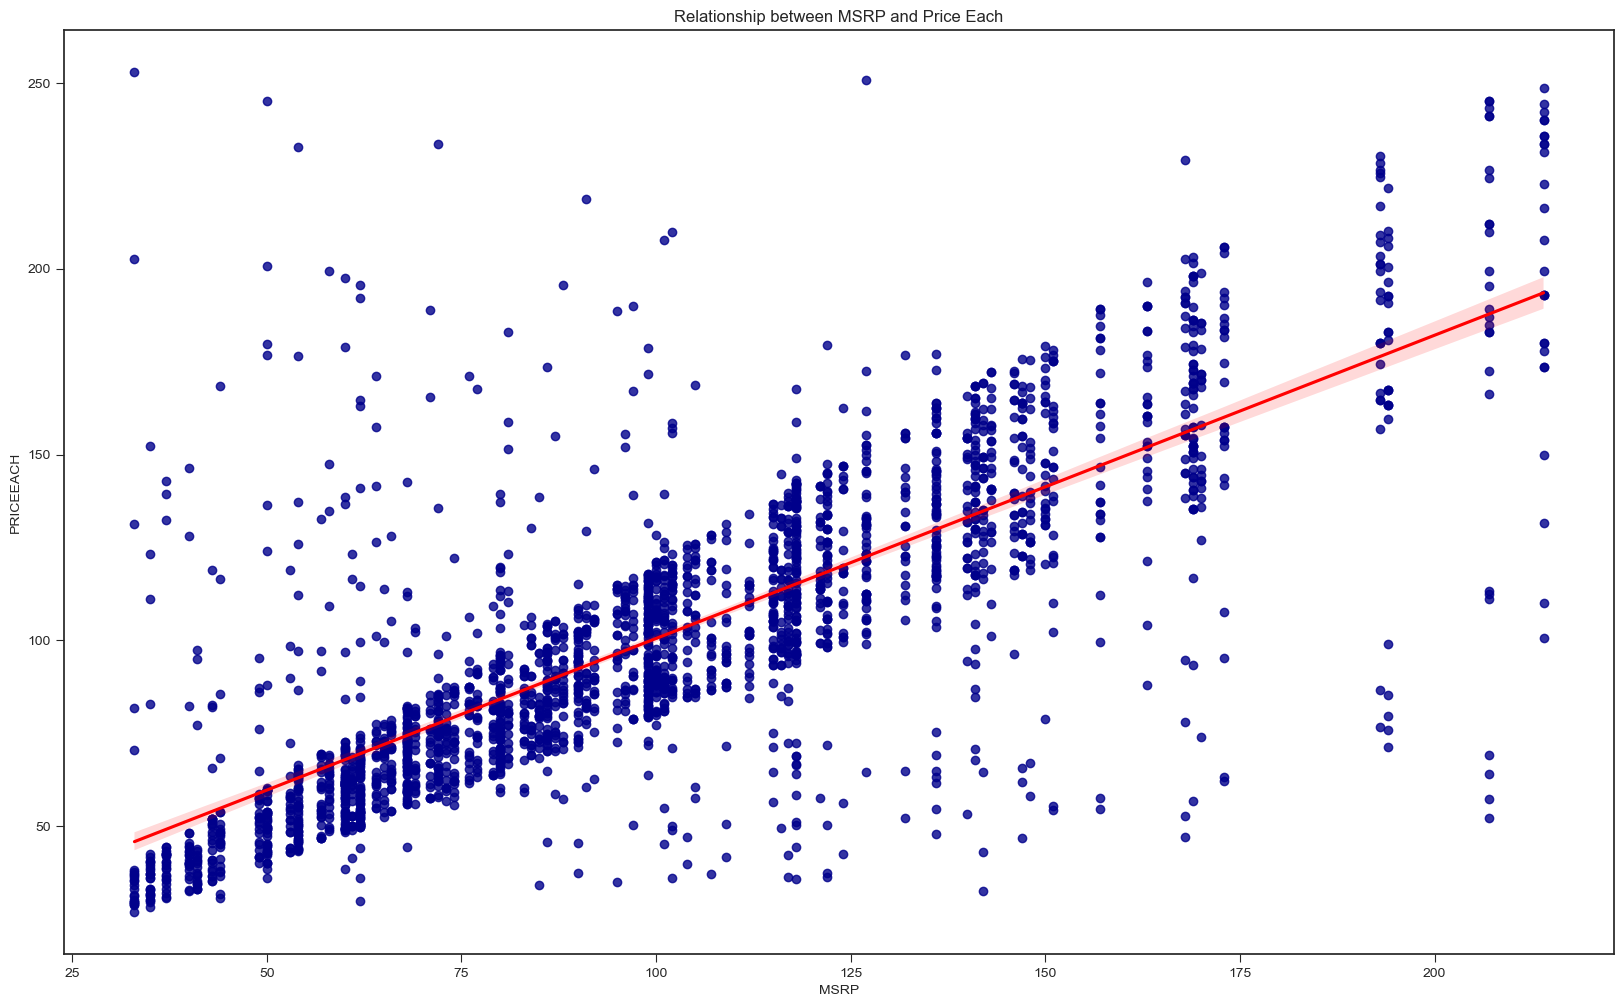

In [59]:
sns.regplot(x='MSRP', y='PRICEEACH', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('MSRP')
plt.ylabel('PRICEEACH')
plt.title('Relationship between MSRP and Price Each')

<b>The higher the MSRP means higher price each and vice versa.</b>

<h6><b>MSRP and Sales</b></h6>

Text(0.5, 1.0, 'Relationship between MSRP and Sales')

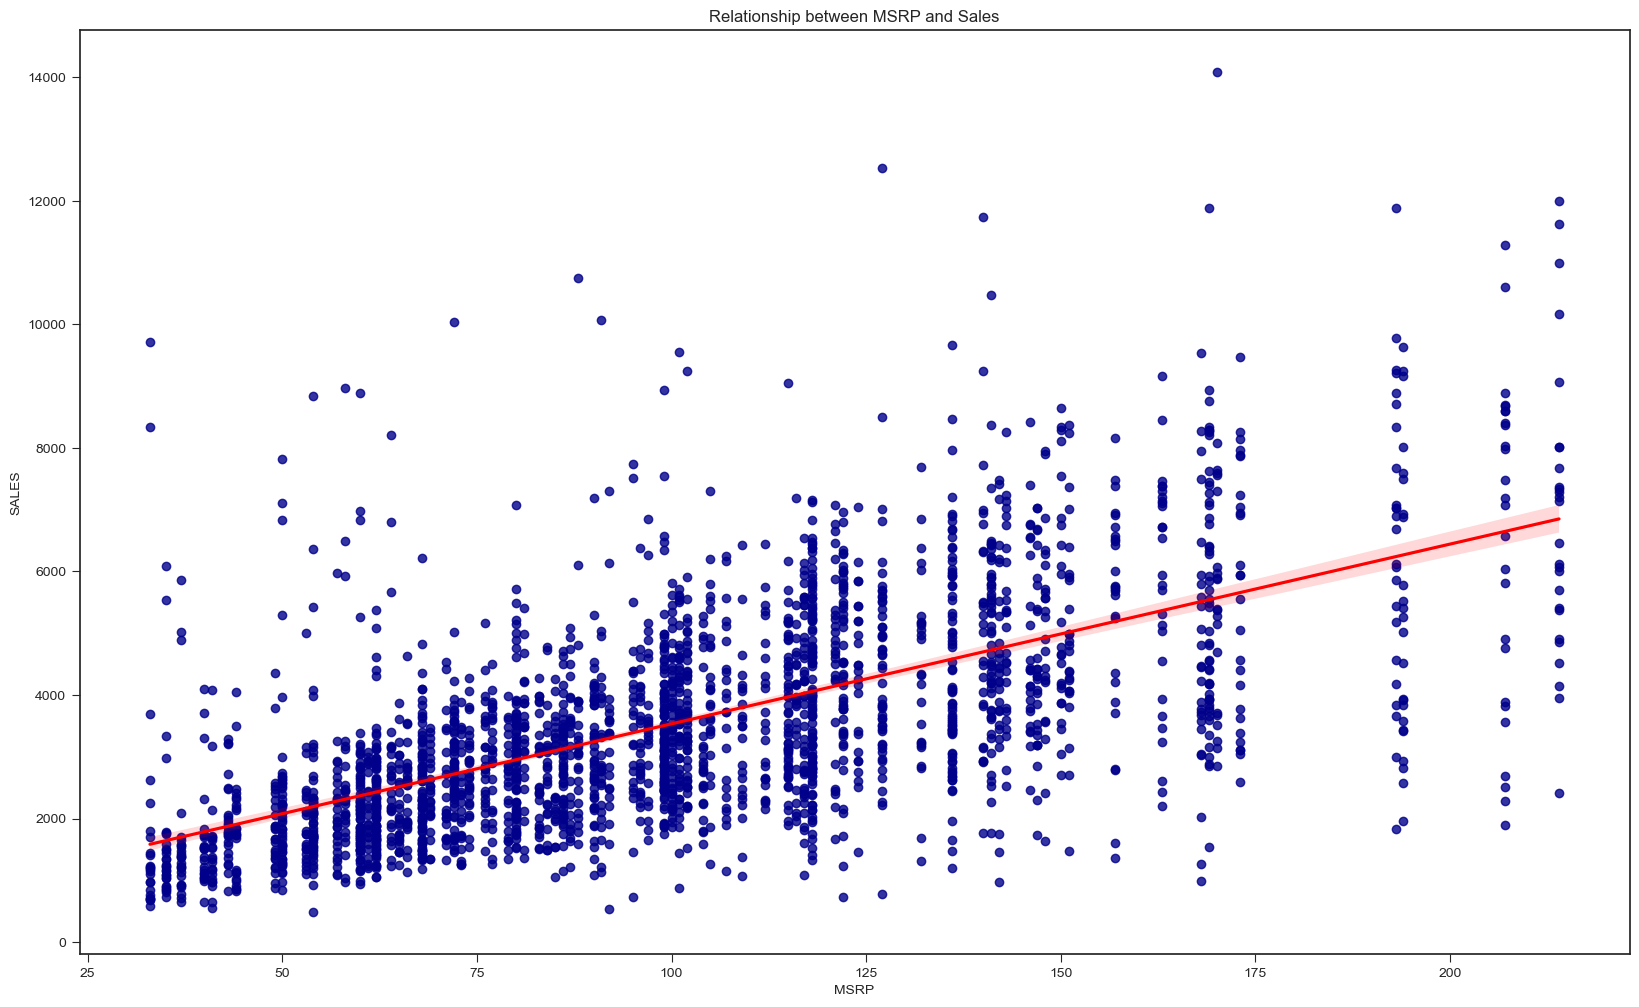

In [60]:
sns.regplot(x='MSRP', y='SALES', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('MSRP')
plt.ylabel('SALES')
plt.title('Relationship between MSRP and Sales')

<b>The higher sales made, the higher the MSRP and vice versa.</b>

<h6><b>Sales and Quantity Ordered</b></h6>

Text(0.5, 1.0, 'Relationship between Sales and Price Each')

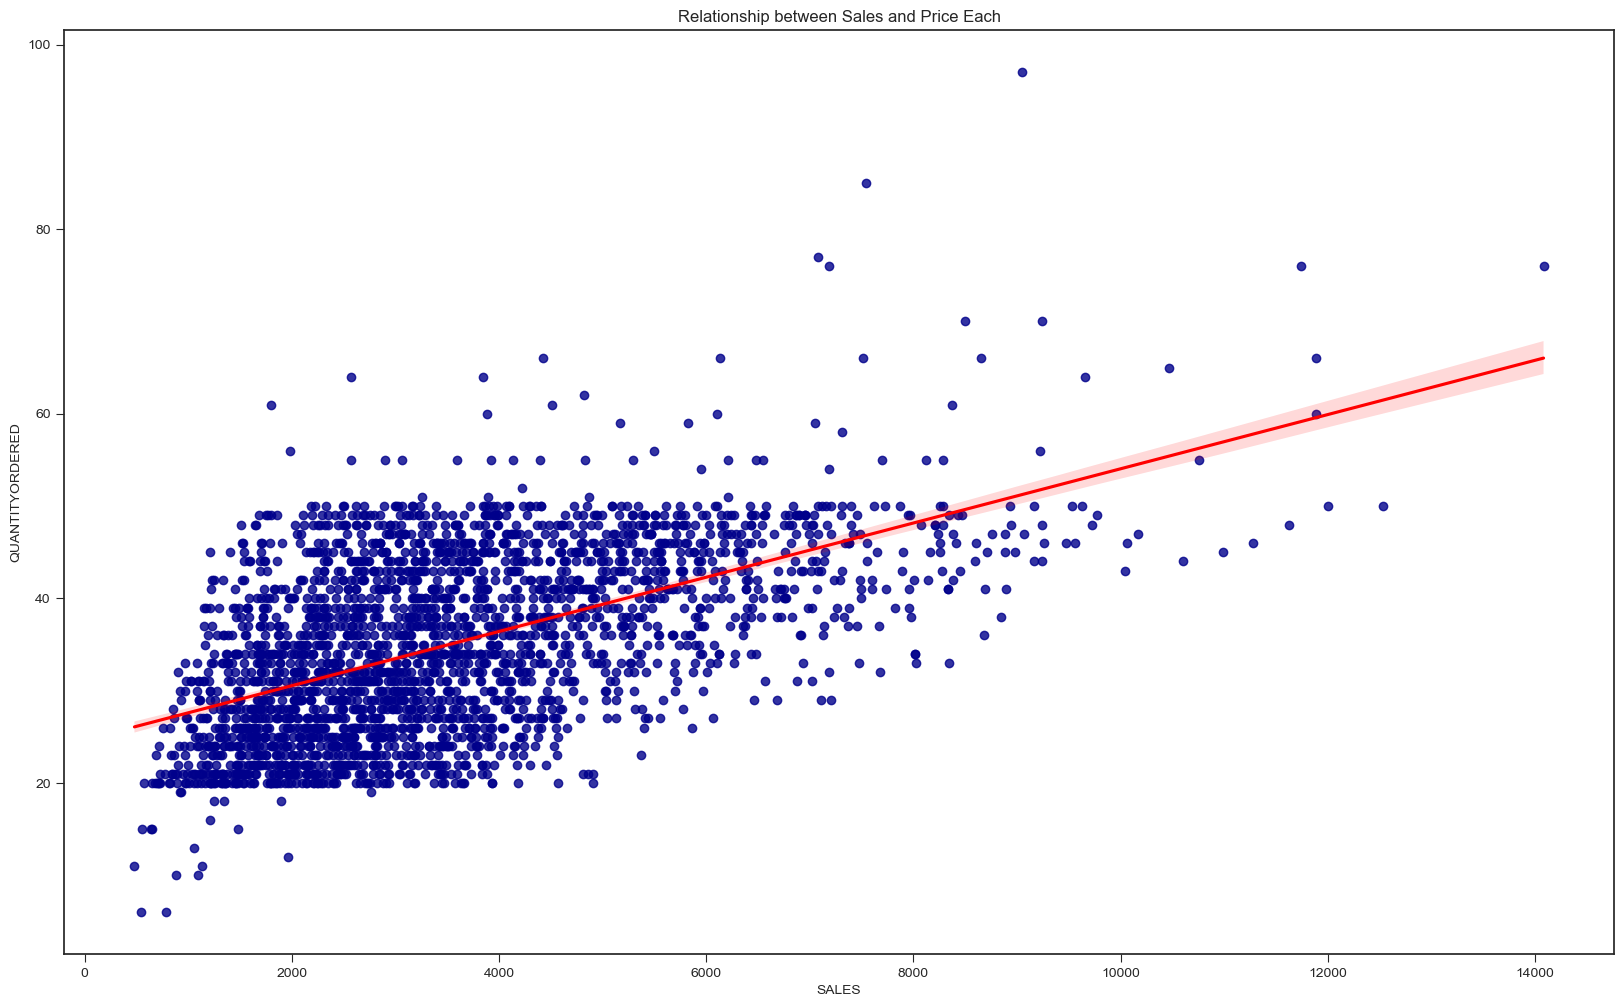

In [62]:
sns.regplot(x='SALES', y='QUANTITYORDERED', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('Relationship between Sales and Price Each')

<b>The higher the Sales made, the more Quantity Ordered is expected and vice versa.</b>

<h5><b>Negative Correlation</b></h5>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int16  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   int8   
 8   PRODUCTLINE           2747 non-null   int8   
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   int8   
 11  CUSTOMERNAME          2747 non-null   int8   
 12  PHONE                 2747 non-null   int8   
 13  ADDRESSLINE1          2747 non-null   int8   
 14  CITY                  2747 non-null   int8   
 15  POSTALCODE           

<h6><b>Dealsize and Sales</b></h6>

Text(0.5, 1.0, 'Relationship between DEALSIZE and SALES')

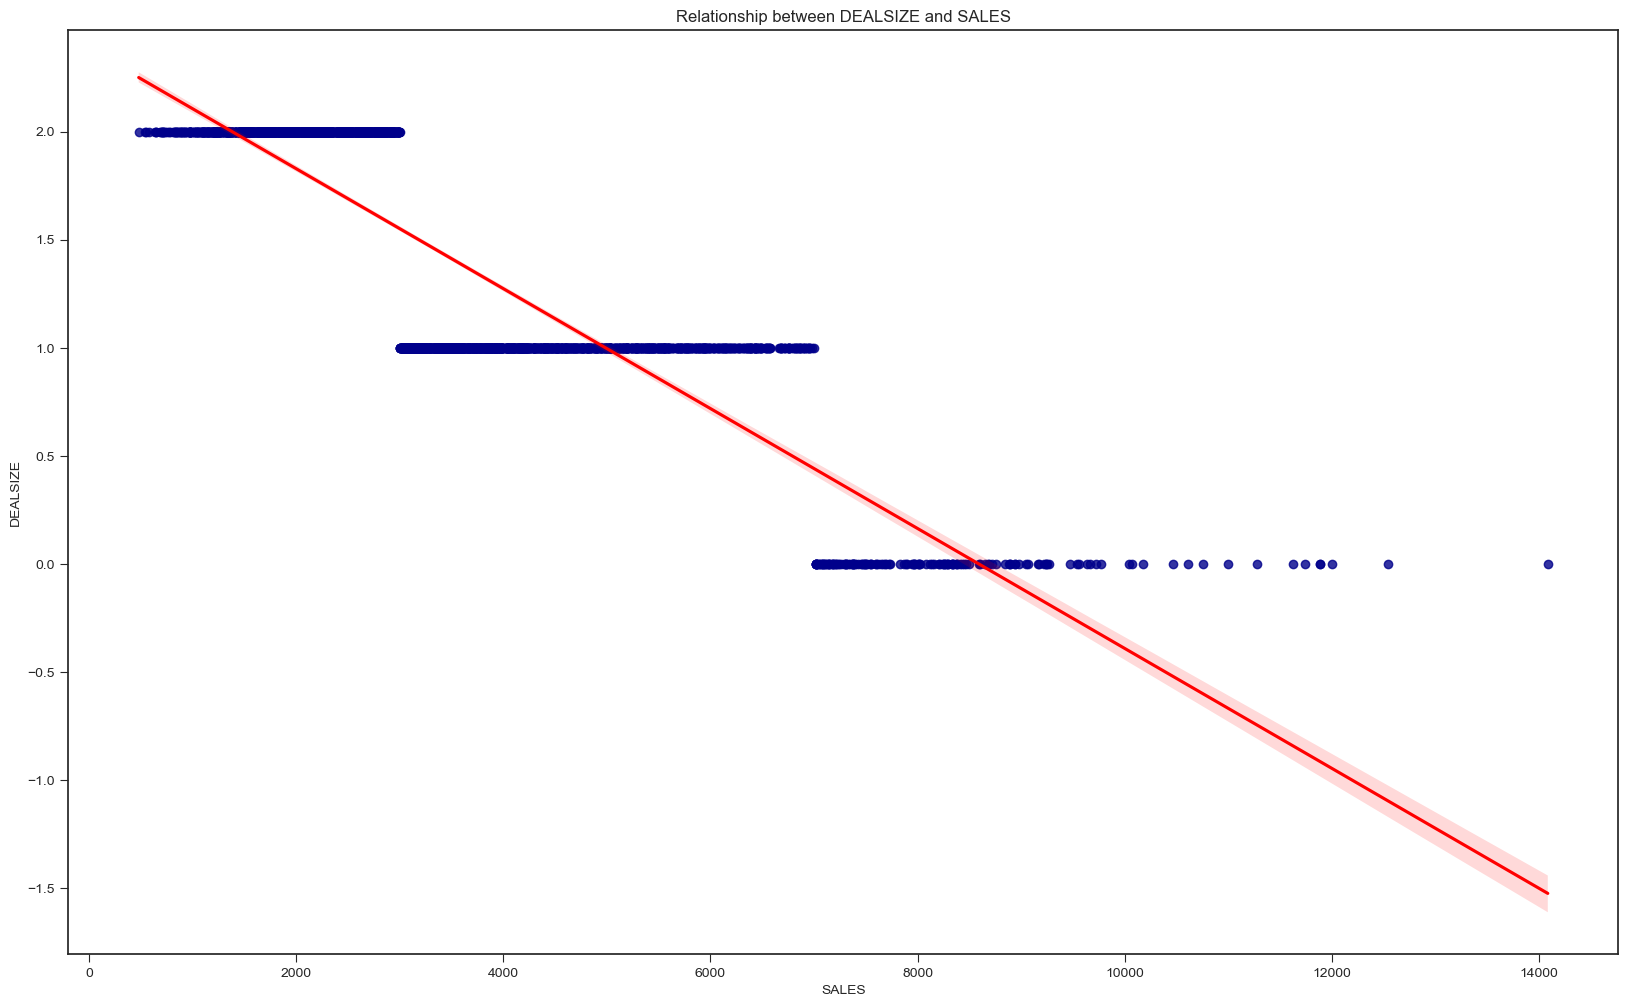

In [56]:
sns.regplot(x='SALES', y='DEALSIZE', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('SALES')
plt.ylabel('DEALSIZE')
plt.title('Relationship between DEALSIZE and SALES')

In [53]:
df.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values(by=['SALES'], ascending=False)

,DEALSIZE,SALES
1,1,"5,931,231.5"
2,2,"2,570,033.8"
0,0,"1,258,956.4"


In [55]:
df1 = pd.read_csv(r"D:\nevinphilbert\Portfolio\Full-Stack Projects\Automotive Sales Data Analysis\Dataset\Auto Sales data.csv")
df1.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values(by=['SALES'], ascending=False)

,DEALSIZE,SALES
1,Medium,"5,931,231.5"
2,Small,"2,570,033.8"
0,Large,"1,258,956.4"


<b>The larger the dealsize, the lower sales made is expected, and Vice Versa</b>

<h6><b>Dealsize and Price Each</b></h6>

Text(0.5, 1.0, 'Relationship between DEALSIZE and PRICEEACH')

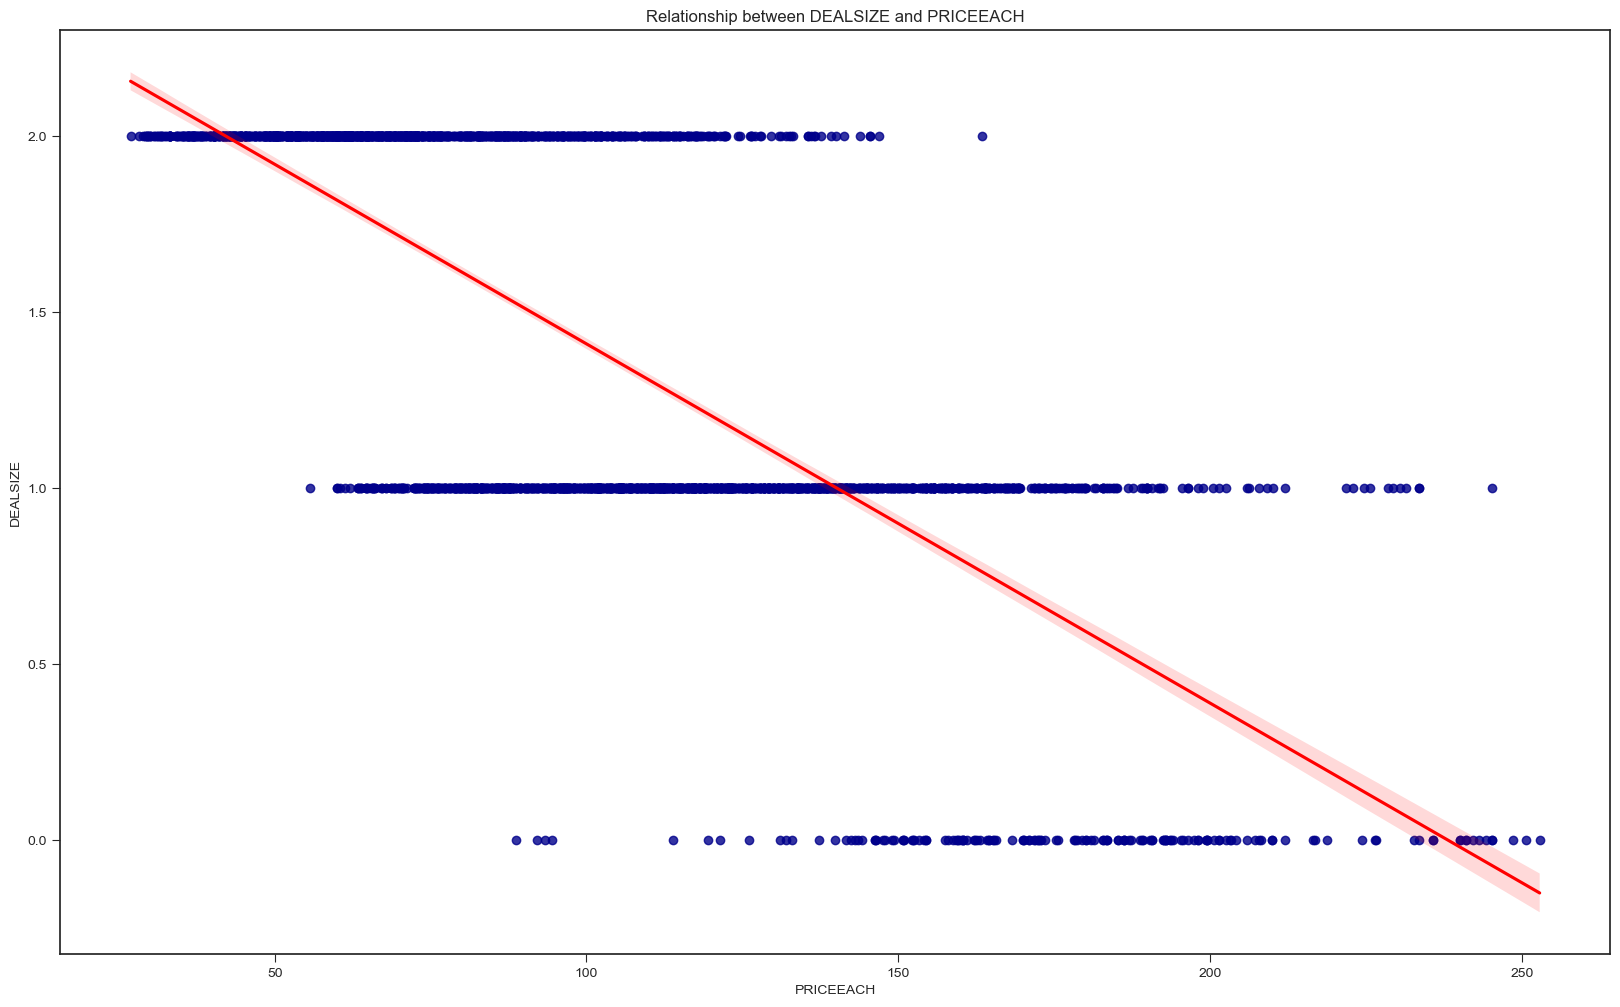

In [64]:
sns.regplot(x='PRICEEACH', y='DEALSIZE', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('PRICEEACH')
plt.ylabel('DEALSIZE')
plt.title('Relationship between DEALSIZE and PRICEEACH')

<b>The larger the dealsize, the lower price of each item is expected, and Vice Versa</b>

<h6><b>Dealsize and MSRP</b></h6>

Text(0.5, 1.0, 'Relationship between DEALSIZE and MSRP')

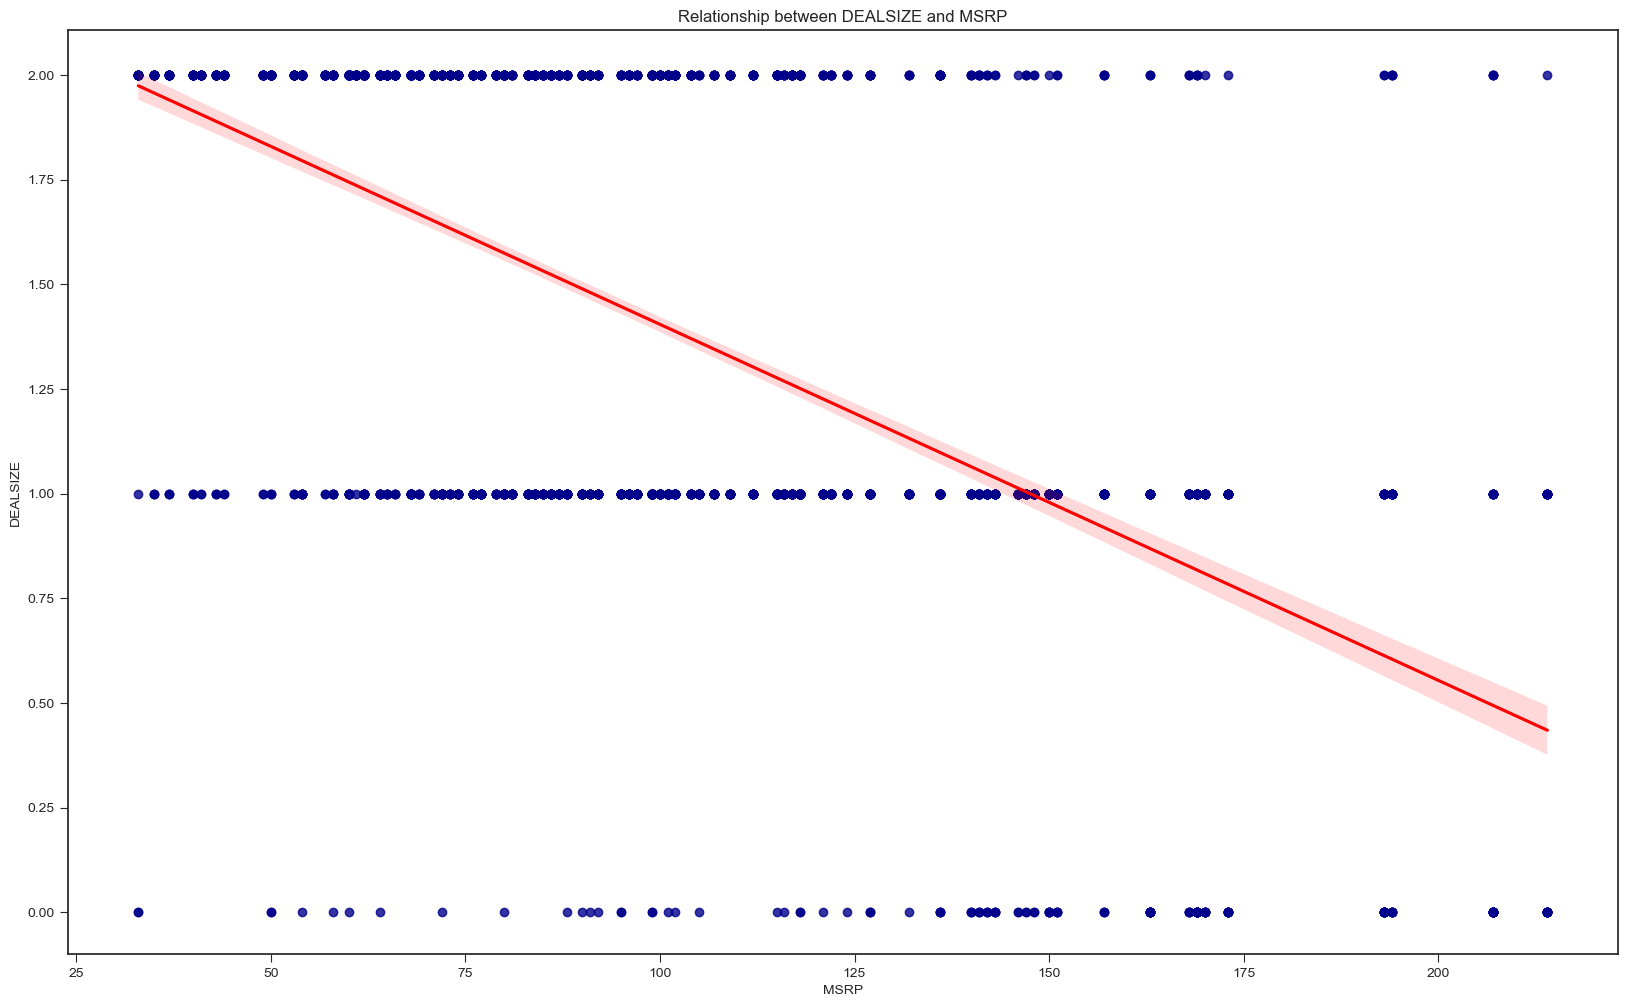

In [67]:
sns.regplot(x='MSRP', y='DEALSIZE', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('MSRP')
plt.ylabel('DEALSIZE')
plt.title('Relationship between DEALSIZE and MSRP')

<b>The larger the dealsize, the lower MSRP of each item is expected, and Vice Versa</b>

<h6><b>MSRP and Product Code</b></h6>

Text(0.5, 1.0, 'Relationship between MSRP and PRODUCTCODE')

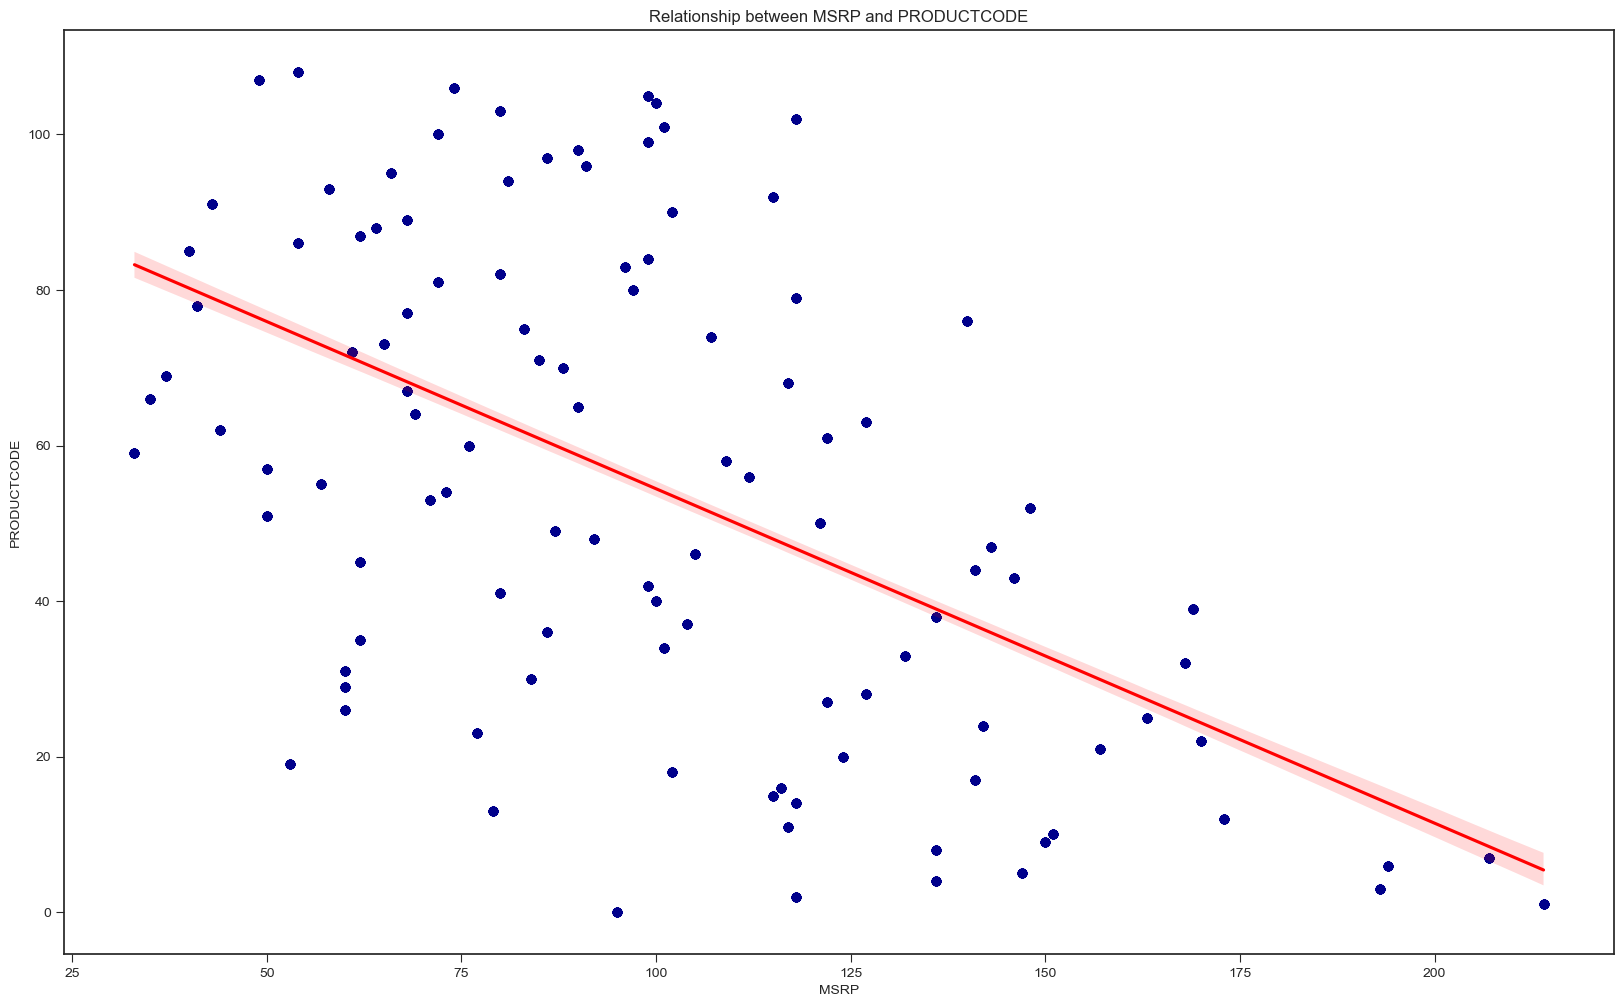

In [68]:
sns.regplot(x='MSRP', y='PRODUCTCODE', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('MSRP')
plt.ylabel('PRODUCTCODE')
plt.title('Relationship between MSRP and PRODUCTCODE')

<b>The higher the MSRP, the lower product code is expected, and Vice Versa</b>

<h6><b>MSRP and Days Since Last Order</b></h6>

Text(0.5, 1.0, 'Relationship between MSRP and DAYS_SINCE_LASTORDER')

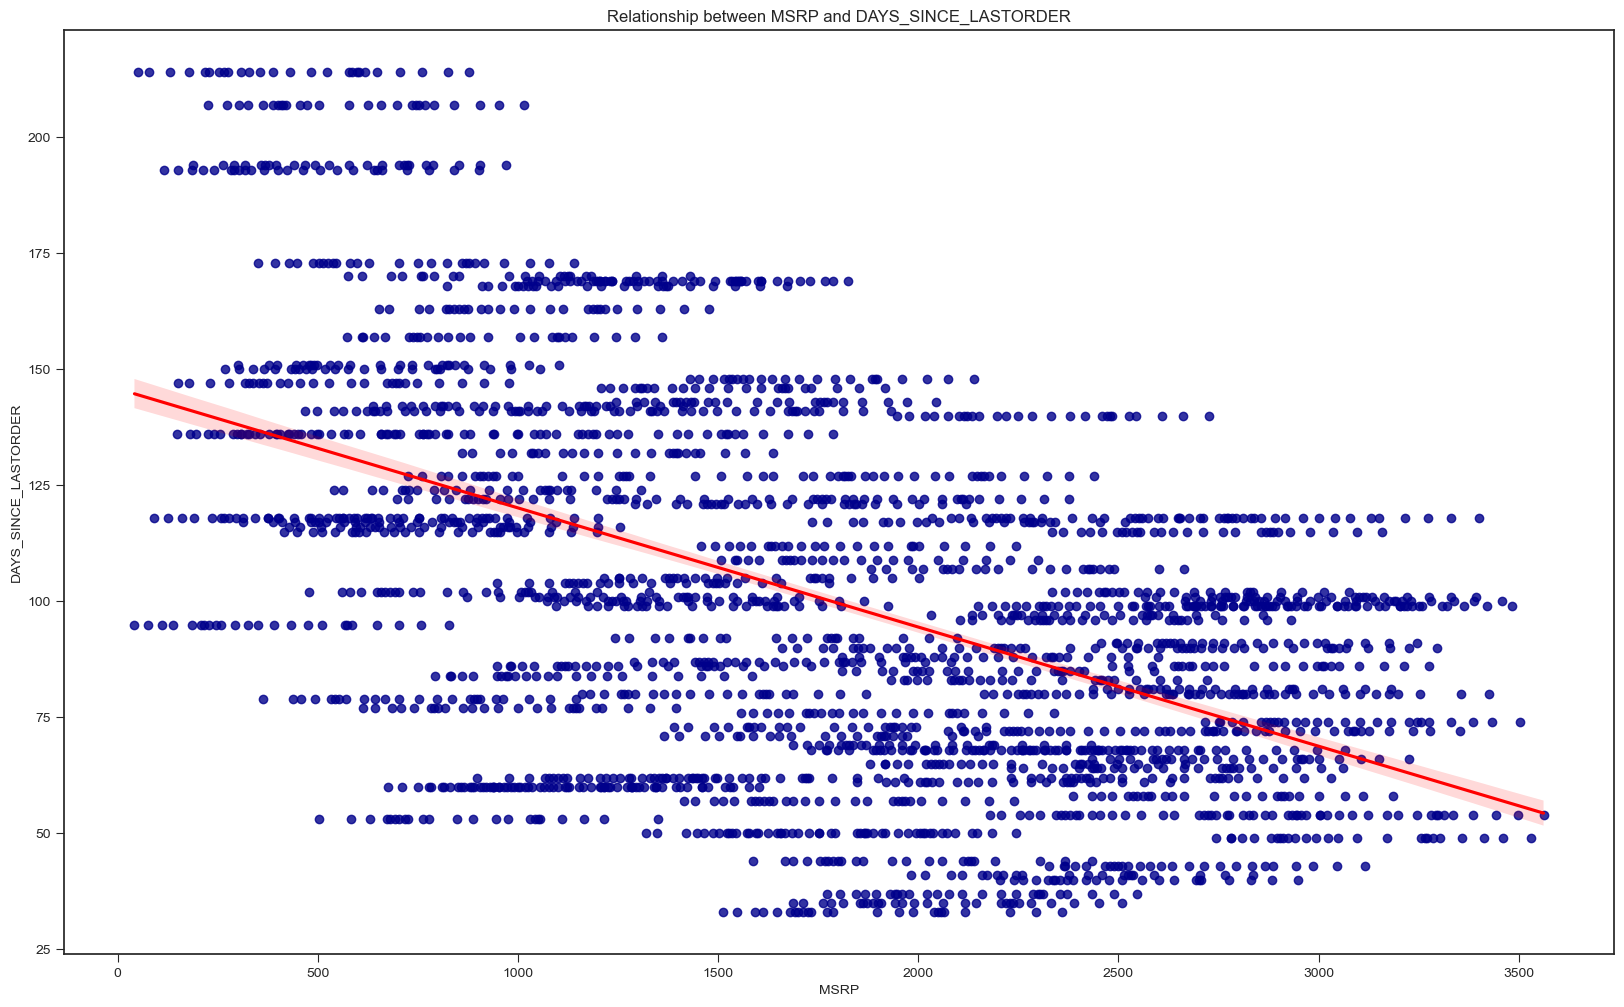

In [71]:
sns.regplot(x='DAYS_SINCE_LASTORDER', y='MSRP', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('MSRP')
plt.ylabel('DAYS_SINCE_LASTORDER')
plt.title('Relationship between MSRP and DAYS_SINCE_LASTORDER')

<b>The lower the MSRP, The higher days since last order is expected, or vice versa</b>

<h6><b>Dealsize and Quantity Ordered.</b></h6>

Text(0.5, 1.0, 'Relationship between DEALSIZE and QUANTITYORDERED')

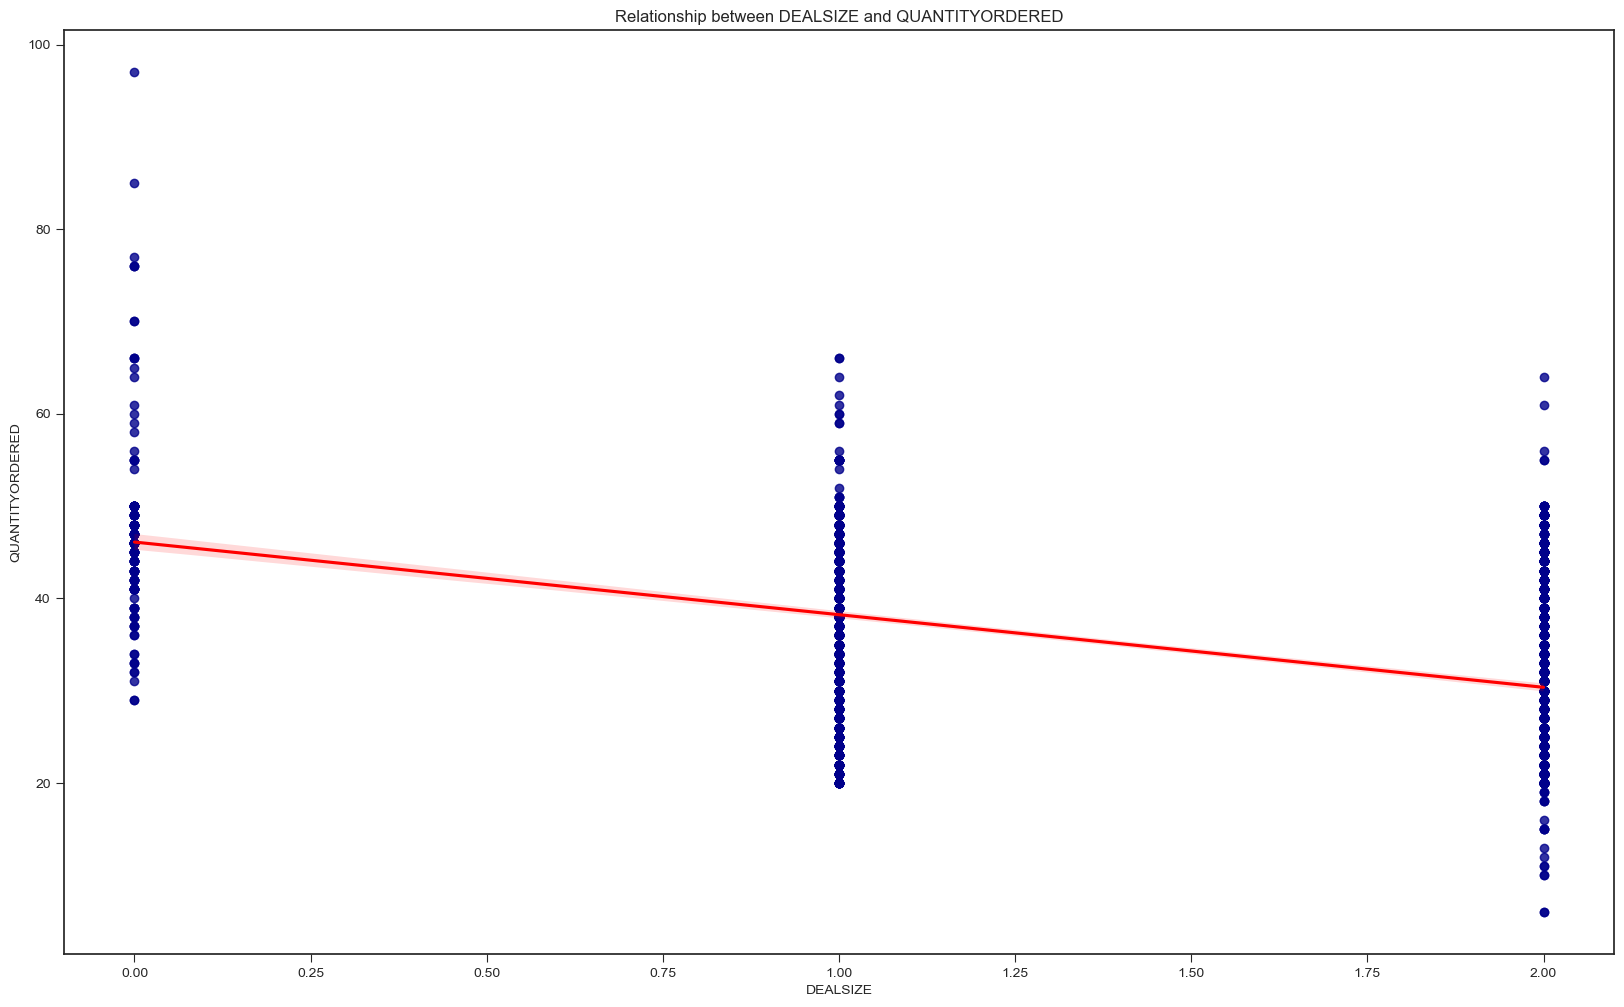

In [72]:
sns.regplot(x='DEALSIZE', y='QUANTITYORDERED', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('DEALSIZE')
plt.ylabel('QUANTITYORDERED')
plt.title('Relationship between DEALSIZE and QUANTITYORDERED')

In [75]:
df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index().sort_values(by=['QUANTITYORDERED'], ascending=False)

,DEALSIZE,QUANTITYORDERED
1,1,51209
2,2,38025
0,0,7194


In [76]:
df1.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index().sort_values(by=['QUANTITYORDERED'], ascending=False)

,DEALSIZE,QUANTITYORDERED
1,Medium,51209
2,Small,38025
0,Large,7194


<b>The larger the dealsize, the smaller quantity ordered of each item is expected</b>